## CREATED BY HCY 20200720
## BACKGROUND：Kaggle 癌症预测

In [1]:
import numpy as np
import pandas as pd
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv1D, MaxPool1D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.optimizers import Adam

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

E:\Anaconda5.2\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [3]:
cancer = datasets.load_breast_cancer()

In [4]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [5]:
X = pd.DataFrame(cancer.data, columns=cancer.feature_names)

In [6]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
y = cancer.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [9]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [10]:
X.shape

(569, 30)

In [11]:
len(y)

569

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [13]:
train_test_split??

In [14]:
X_train.shape

(455, 30)

In [15]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
X_train = X_train.reshape(455, 30, 1)
X_test = X_test.reshape(114, 30, 1)

In [20]:
epoch = 50
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=2, activation='relu', input_shape=(30, 1)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(filters=64, kernel_size=2, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 29, 32)            96        
_________________________________________________________________
batch_normalization_v2 (Batc (None, 29, 32)            128       
_________________________________________________________________
dropout (Dropout)            (None, 29, 32)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 28, 64)            4160      
_________________________________________________________________
batch_normalization_v2_1 (Ba (None, 28, 64)            256       
_________________________________________________________________
dropout_1 (Dropout)          (None, 28, 64)            0         
_________________________________________________________________
flatten (Flatten)            (None, 1792)             

In [22]:
model.compile(optimizer=Adam(lr=0.00005), loss='binary_crossentropy', metrics=['accuracy'])


In [24]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), verbose=1, epochs=epoch)

Train on 455 samples, validate on 114 samples
Epoch 1/50
455/455 [==============================] - 0s 230us/sample - loss: 0.4834 - accuracy: 0.7846 - val_loss: 0.6206 - val_accuracy: 0.8947
Epoch 2/50
455/455 [==============================] - 0s 198us/sample - loss: 0.3194 - accuracy: 0.8505 - val_loss: 0.5878 - val_accuracy: 0.9123
Epoch 3/50
455/455 [==============================] - 0s 204us/sample - loss: 0.2673 - accuracy: 0.8791 - val_loss: 0.5554 - val_accuracy: 0.8860
Epoch 4/50
455/455 [==============================] - 0s 201us/sample - loss: 0.2567 - accuracy: 0.9055 - val_loss: 0.5236 - val_accuracy: 0.8947
Epoch 5/50
455/455 [==============================] - 0s 202us/sample - loss: 0.2052 - accuracy: 0.9253 - val_loss: 0.4924 - val_accuracy: 0.8947
Epoch 6/50
455/455 [==============================] - 0s 197us/sample - loss: 0.1923 - accuracy: 0.9275 - val_loss: 0.4603 - val_accuracy: 0.8947
Epoch 7/50
455/455 [==============================] - 0s 199us/sample - loss: 

In [26]:
def plot_learningCureve(history):
    epoch_range = range(1, 51)
    plt.plot(epoch_range, history.history['accuracy'])
    plt.plot(epoch_range, history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()
    
    plt.plot(epoch_range, history.history['loss'])
    plt.plot(epoch_range, history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

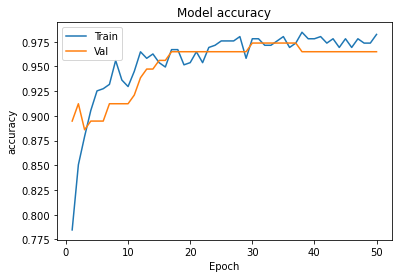

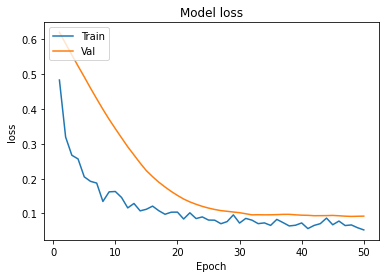

In [27]:
plot_learningCureve(history)

## LighGBM建模

In [36]:
# coding: utf-8
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import gc
import os
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from datetime import datetime
from sklearn_pandas import DataFrameMapper
from sklearn.preprocessing import LabelBinarizer
from sklearn2pmml.decoration import CategoricalDomain, ContinuousDomain
from sklearn2pmml import PMMLPipeline
import time
import joblib
import pickle
from sklearn import metrics
import sys
sys.path.append("F:\pythonWork\hcytools")
import whytools.features_engine as fe
import whytools.evaluate as ev
import whytools.process_data as prod
import seaborn as sns
from collections import Counter
import lightgbm as lgb
from Modelling_tools import KSTool

In [41]:
ks = KSTool.KS_Util()

train 0.9062951496388029 test 0.8690476190476191
<BarContainer object of 3 artists>


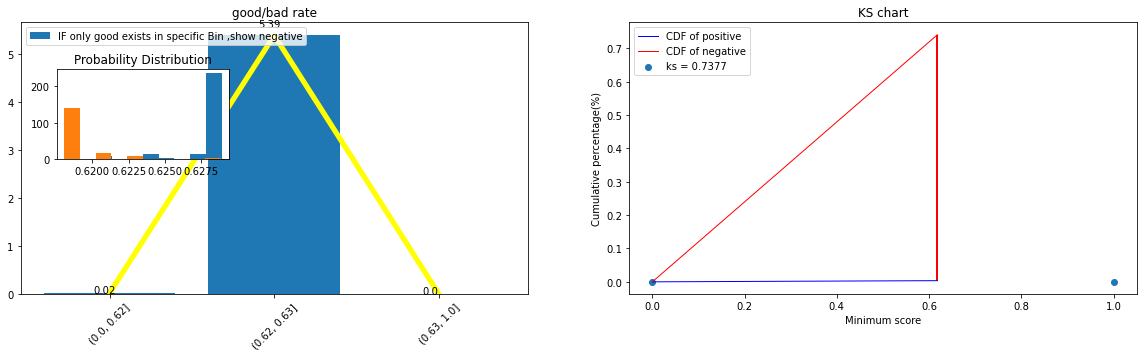

<BarContainer object of 3 artists>


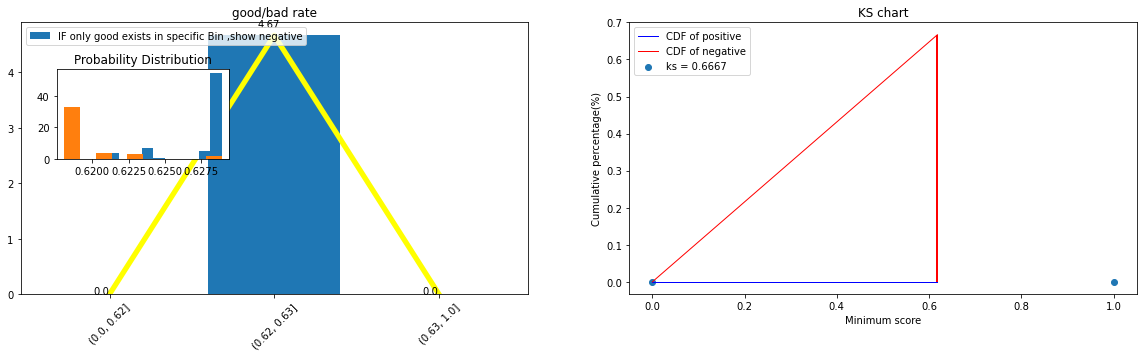

Wall time: 674 ms


In [58]:
%%time
model = LGBMClassifier(boosting_type='gbdt', colsample_bytree=0.85,
        drop_rate=0.5, is_unbalance=True,
        learning_rate=0.001, max_bin=3, max_depth=2,
        max_drop=5, min_child_samples=3, min_child_weight=0.5,
        min_split_gain=0.1, n_estimators=50, nthread=20,
        num_leaves=8, objective='binary', reg_alpha=50, reg_lambda=50,
        scale_pos_weight=1, seed=27, sigmoid=1.0, silent=True,
        skip_drop=0.5, subsample=0.79, subsample_for_bin=50,
        subsample_freq=1, uniform_drop=False, xgboost_dart_mode=True)

model.fit(X_train.reshape(455, 30), y_train)
prob1 = model.predict_proba(X_train.reshape(455, 30))
ekk1 = ev.ks_statistic(yprob=prob1[:,1],ytrue=y_train)
ekk1.cal_ks()


prob2 = model.predict_proba(X_test.reshape(114, 30))
ekk2 = ev.ks_statistic(yprob=prob2[:,1],ytrue=y_test)
ekk2.cal_ks()

print("train",ekk1.ks,'test',ekk2.ks)
ks.ks(pd.DataFrame(prob1[:,1]),pd.DataFrame(y_train))
ks.ks(pd.DataFrame(prob2[:,1]),pd.DataFrame(y_test))

In [65]:
from lgbm_opt import bayes_optimization

In [66]:
hp = bayes_optimization.hp_opt(X_train.reshape(455, 30),y_train,  X_test.reshape(114, 30), y_test, num_eval=20, is_unbalance=True, metric='ks')

In [67]:
hp.get_best_params()

100%|██████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 24.07trial/s, best loss: -0.0]


In [68]:
model_best = hp.get_model()

train 0.9062951496388029 test 0.8690476190476191
<BarContainer object of 3 artists>


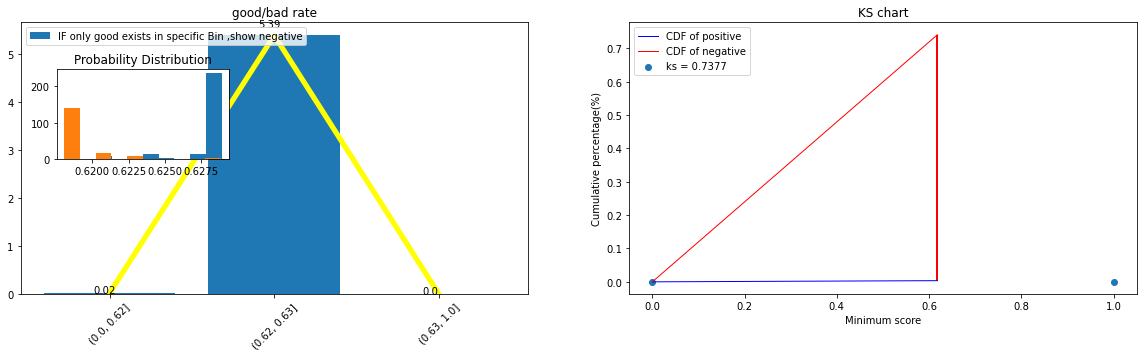

<BarContainer object of 3 artists>


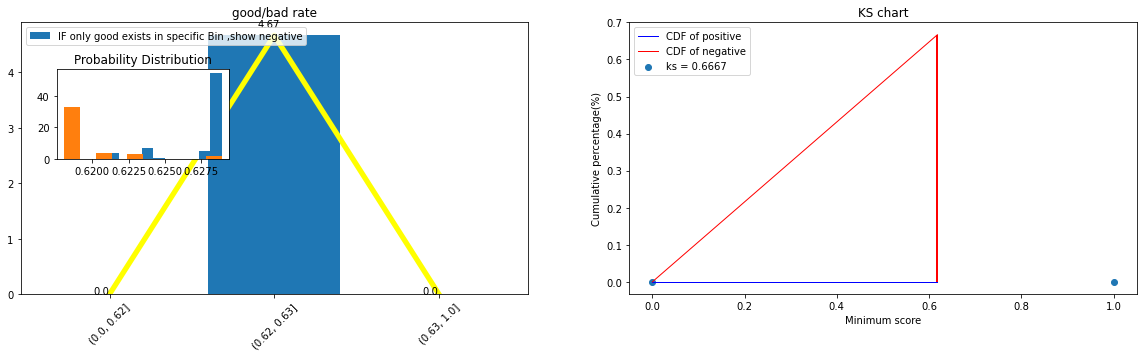

In [69]:
model_best.fit(X_train.reshape(455, 30), y_train)
prob1 = model.predict_proba(X_train.reshape(455, 30))
ekk1 = ev.ks_statistic(yprob=prob1[:,1],ytrue=y_train)
ekk1.cal_ks()


prob2 = model.predict_proba(X_test.reshape(114, 30))
ekk2 = ev.ks_statistic(yprob=prob2[:,1],ytrue=y_test)
ekk2.cal_ks()

print("train",ekk1.ks,'test',ekk2.ks)
ks.ks(pd.DataFrame(prob1[:,1]),pd.DataFrame(y_train))
ks.ks(pd.DataFrame(prob2[:,1]),pd.DataFrame(y_test))

In [71]:
bayes_optimization??